In [ ]:
# you will need cvxopt and cvxpy

arrival
[ 0.  6. -0. -0. -0.  7. -0. -0.  0.  0.  0. -0.]
order
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
stock
[2. 4. 3. 3. 2. 6. 5. 2. 2. 2. 2. 2.]
[4]
120.0


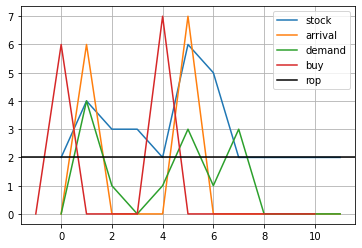

In [59]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

np.random.seed(999)
n_months = 12
initial_stock = 2
demand = np.random.randint(5, size=12)

processing_fee = 10
unit_price = 5
storage_fee = 1
lead_time = 1
min_stock = 2
max_stock = 7
min_order = 3
max_order = 100

arrival = cp.Variable(n_months, name='arrival') # buy shifted to the right
order = cp.Variable(n_months, name='order', boolean=True)
stock = cp.cumsum(arrival - demand) + initial_stock # current stock

cost = cp.sum(processing_fee* order) + cp.sum(unit_price * arrival) + cp.sum(storage_fee * stock)

constraints = [
    stock >= min_stock,
    stock <= max_stock,
    arrival >= 0,
    arrival <= max_order*order, # linearize minimimum(arrival, 1). Minimum is concave so cant' do it that way.
    arrival >= min_order*order # minimum ordering
]

obj = cp.Minimize(cost)

prob = cp.Problem(obj, constraints)
prob.solve()

print('arrival')
print(arrival.value)
print('order')
print(order.value)
print('stock')
print(stock.value)

time = np.arange(len(arrival.value))

plt.plot(stock.value, label='stock')
plt.plot(arrival.value, label='arrival')
plt.plot(demand, label='demand')

xs_with_lead_time = time - lead_time

plt.plot(xs_with_lead_time, arrival.value, label='buy')



# rop is maximum stock when order occur.
has_order = np.array(np.where(order.value > 0.1)) - lead_time
has_order = has_order[has_order >= 0.1]
print(has_order)
rop = max(stock.value[has_order])
plt.axhline(rop, label='rop', color='k')

plt.legend()
plt.grid()

print(obj.value)